<a href="https://colab.research.google.com/github/BRAYAN142002/MineriaDeDatos-webScraping/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos la libreria BautifulSoup
import requests
from bs4 import BeautifulSoup
import textwrap

In [ ]:
# URL de la página que queremos analizar
website = 'https://elpais.com/tecnologia/2024-12-09/la-red-social-x-antes-twitter-permanece-varias-horas-caida-en-su-version-web.html'


In [ ]:
#encabezado lo cual ayuda a evitar bloqueos por parte dl servidor
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}

In [ ]:
# procedemos a enviar la solicitud Http
try:
    resultado = requests.get(website, headers=headers)
    #verificamos ifue exitosa
    resultado.raise_for_status()
    contenido = resultado.text
except requests.exceptions.RequestException as e:
    print("Error en la solicitud:", e)
    exit()

In [ ]:
# ahora tenemos que analizar el contenido HtML con BeatifulSoup
soup = BeautifulSoup(contenido, 'lxml')

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="es">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="//static.elpais.com" rel="preconnect"/>
  <link href="//ep00.epimg.net" rel="preconnect"/>
  <link href="//imagenes.elpais.com" rel="preconnect"/>
  <link href="//assets.adobedtm.com" rel="preconnect"/>
  <link as="image" fetchpriority="high" href="https://imagenes.elpais.com/resizer/v2/SW2I6RIQ6FDC5CPKOBO7HDWXC4.jpg?auth=3b0182f4168e446d6b6d7bc0c1f9411238f464e9789ea4ee1c9e2cfd8a152a25&amp;width=414" imagesizes="(min-width:1199px)1155px,(min-width:1001px)95vw,(min-width:768px)767px,100vw" imagesrcset="https://imagenes.elpais.com/resizer/v2/SW2I6RIQ6FDC5CPKOBO7HDWXC4.jpg?auth=3b0182f4168e446d6b6d7bc0c1f9411238f464e9789ea4ee1c9e2cfd8a152a25&amp;width=414 414w,https://imagenes.elpais.com/resizer/v2/SW2I6RIQ6FDC5CPKOBO7HDWXC4.jpg?auth=3b0182f4168e446d6b6d7bc0c1f9411238f464e9789ea4ee1c9e2cfd8a152a25&amp;width=828 640w,https://imagenes.elp

**1. Obtener el título de la noticia**

In [ ]:
#ahora vamos a buscar un elemento dentro del html
caja=soup.find('article',class_='a _g _g-lg _g-o')

In [ ]:
print(caja)

<article class="a _g _g-lg _g-o"><header class="a_e _g _g-xs"><div class="a_e_txt _df"><div class="a_k _df"><a class="a_k_n" href="https://elpais.com/noticias/twitter/">Twitter</a></div><h1 class="a_t">La red social X, antes Twitter, permanece varias horas caída en su versión web</h1><h2 class="a_st">Algunos usuarios españoles no pudieron visualizar mensajes en el navegador desde la noche del domingo hasta el mediodía del lunes</h2></div><div class="a_e_m"><figure class="a_m a_m-h"><span class="a_m_w _db"><img alt="Caida X" class="_re a_m-h" decoding="auto" height="277" loading="eager" sizes="(min-width:1199px)1155px,(min-width:1001px)95vw,(min-width:768px)767px,100vw" src="https://imagenes.elpais.com/resizer/v2/SW2I6RIQ6FDC5CPKOBO7HDWXC4.jpg?auth=3b0182f4168e446d6b6d7bc0c1f9411238f464e9789ea4ee1c9e2cfd8a152a25&amp;width=414" srcset="https://imagenes.elpais.com/resizer/v2/SW2I6RIQ6FDC5CPKOBO7HDWXC4.jpg?auth=3b0182f4168e446d6b6d7bc0c1f9411238f464e9789ea4ee1c9e2cfd8a152a25&amp;width=414 

In [ ]:
#aqui buscamos la etiqueta h1 el cual es el titulo de nuestra noticia
if caja:
  titulo=caja.find('h1').text.strip()
else:
  print("No se encontro el articulo")


In [ ]:
print(titulo)

La red social X, antes Twitter, permanece varias horas caída en su versión web


2. Obtenga las sesiones de la página.

In [ ]:
#para obtener todas las secciones
secciones = soup.find_all('section')


In [ ]:
for i, seccion in enumerate(secciones, start=1):
    texto = seccion.get_text(strip=True)
    print(f"Sección {i}:")
    print(texto[:500])
    print("-" * 50)

Sección 1:
Más informaciónRose Wang, directora de operaciones de Bluesky: “La gente se ha cansado de que el algoritmo lo decida todo”Manuel G. Pascual‘Maripostear’ o ‘bluitear’: ¿cuál es la forma correcta de llamar a los mensajes en Bluesky?El País
--------------------------------------------------
Sección 2:
Archivado EnTwitterTecnologíaRedes socialesElon MuskNuevas tecnologíasGrandes tecnológicasBlueskyNavegadoresInternetEspaña
--------------------------------------------------
Sección 3:
Últimas noticias20:35Vuelos más caros en 2025: el AICM aumenta la Tarifa de Uso de Aeropuerto un 2,5%20:10Hombres encapuchados se llevan a un opositor venezolano a la salida de un restaurante en Caracas20:10Borussia Dortmund - Barcelona en directo | Flick sale con el mismo once que jugó ante el Betis20:05Puente despliega datos sobre su gestión de la dana frente a las acusaciones de corrupción del PP
--------------------------------------------------
Sección 4:
Lo más vistoGoogle presenta Willow, un 

In [ ]:
div=soup.find_all('div')

In [ ]:
for i, seccion in enumerate(div, start=1):
    texto = seccion.get_text(strip=True)
    print(f"Div {i}:")
    print(texto[:500])
    print("-" * 50)

Div 1:
_
--------------------------------------------------
Div 2:
_
--------------------------------------------------
Div 3:
__
--------------------------------------------------
Div 4:
_
--------------------------------------------------
Div 5:
_
--------------------------------------------------
Div 6:
_
--------------------------------------------------
Div 7:
Seleccione:- - -EspañaAméricaMéxicoColombiaChileArgentinaUS EspañolUS EnglishTecnologíasuscríbeteHHOLAIniciar sesión
--------------------------------------------------
Div 8:
Seleccione:- - -EspañaAméricaMéxicoColombiaChileArgentinaUS EspañolUS EnglishTecnologíasuscríbeteHHOLAIniciar sesión
--------------------------------------------------
Div 9:
Seleccione:- - -EspañaAméricaMéxicoColombiaChileArgentinaUS EspañolUS EnglishTecnologíasuscríbeteHHOLAIniciar sesión
--------------------------------------------------
Div 10:
Seleccione:- - -EspañaAméricaMéxicoColombiaChileArgentinaUS EspañolUS English
----------------------------

In [ ]:
#enconctramos las seccines 'Article'
Ariculos=soup.find_all('article')

In [ ]:
for i, seccion in enumerate(Ariculos, start=1):
    texto = seccion.get_text(strip=True)
    print(f"Articulo {i}:")
    print(texto[:500])
    print("-" * 50)

Articulo 1:
TwitterLa red social X, antes Twitter, permanece varias horas caída en su versión webAlgunos usuarios españoles no pudieron visualizar mensajes en el navegador desde la noche del domingo hasta el mediodía del lunesUn usuario muestra una pantalla de móvil con la aplicación de X.Stanislav Kogiku (SOPA Images/ LightRocket/ Getty)El PaísMadrid -09 dic 2024 - 08:33Actualizado:09 dic 2024 - 08:45CETWhatsappFacebookTwitterLinkedinBlueskyCopiar enlaceComentariosLa red social X, propiedad del magnate Elo
--------------------------------------------------
Articulo 2:
20:35Vuelos más caros en 2025: el AICM aumenta la Tarifa de Uso de Aeropuerto un 2,5%
--------------------------------------------------
Articulo 3:
20:10Hombres encapuchados se llevan a un opositor venezolano a la salida de un restaurante en Caracas
--------------------------------------------------
Articulo 4:
20:10Borussia Dortmund - Barcelona en directo | Flick sale con el mismo once que jugó ante el Betis
----------

**3. Obtenga los link de la página. y luego, de cada link obtenga el texto sin etiquetas.**

In [ ]:
#Buscamos tadas la etiquetas <a> y solo considereamos las que tiene el atributo href
links=soup.find_all('a', href=True)

In [ ]:
#ahora debemos recorrer los links sacar las urls y los textos dentro de ellas
for i, link in enumerate(links, start=1):
    url = link['href']
    texto = link.get_text(strip=True)
    print(f"Link {i}: {url}")
    print(f"Texto asociado: {texto}")
    print("*" * 50)

Link 1: https://elpais.com
Texto asociado: España
**************************************************
Link 2: https://elpais.com/america/
Texto asociado: América
**************************************************
Link 3: https://elpais.com/mexico/
Texto asociado: México
**************************************************
Link 4: https://elpais.com/america-colombia/
Texto asociado: Colombia
**************************************************
Link 5: https://elpais.com/chile/
Texto asociado: Chile
**************************************************
Link 6: https://elpais.com/argentina/
Texto asociado: Argentina
**************************************************
Link 7: https://elpais.com/us/
Texto asociado: US Español
**************************************************
Link 8: https://english.elpais.com
Texto asociado: US English
**************************************************
Link 9: https://elpais.com
Texto asociado: 
**************************************************
Link 10: /tecnologi

**4. Obtener los párrafos de una noticia y luego, de cada párrafo obtenga el texto sin etiquetas.**

In [ ]:
#Ahora vamos a realizar la busqueda de los parrafos para esto debemos buscar la seccion donde esten todos los parrafos
seccion=soup.find('div', class_='a_c clearfix')

In [ ]:
#ahora obtenemos parrafo por parrafo
if seccion:
    parrafos = seccion.find_all('p')

    for i, parrafo in enumerate(parrafos, start=1):
         texto = parrafo.get_text(strip=True)
         print("\n".join(textwrap.wrap(texto, width=80)))
         print("\n" + "-" * 80 + "\n")
else:
    print("No se encontró la sección especificada.")

La red social X, propiedad del magnate Elon Musk, ha sufrido una caída de sus
servicios en la versión web desde la noche del domingo hasta el mediodía del
lunes. Ese problema impidió a muchos usuarios visualizar los mensajes, ya que la
opción de la plataforma para navegadores no parecía funcionar y no se cargaba.
La webDown Detector, especializada en detectar en tiempo real percances en
servicios conectados a internet, señalaba que los reportes de la caída ha
comenzado poco antes de las 20.00, hora peninsular española.

--------------------------------------------------------------------------------

El problema ha afectado específicamente a algunos usuarios de España, ya que no
figuran registros de problemas en otros países. Cuando se intentaba entrar en la
web dex.com, aparecía en la plataforma el molesto mensaje: “Algo salió mal.
Intenta recargar”. Cuando se probaba entwitter.com, no lograba cargarse la
página y terminaba por aparecer otro mensaje del navegador: “No se puede acceder

5. Un vez obtenga el texto del párrafo sin etiquetas, este texto será usado por un clasificador de
noticias (deporte, tecnología y política) para clasificar dicha noticia. Para ello se deberá aplicar
previamente un preprocesamiento de texto sobre el texto de la noticia, igual como se vio en clase
en RapidMiner (tokenización, manejo de stopwords, stemming, etc) pero hecho en Colab,
claramente, paso por paso.

**Ejercicio2**

In [ ]:
!apt-get update
# Actualiza la lista de paquetes disponibles y sus versiones en el sistema, asegurándose de que todo esté al día antes de instalar nuevos paquetes.
!apt-get install -y wget gnupg
# Instala las herramientas "wget" (para descargar archivos de internet) y "gnupg" (para manejar claves de seguridad). La opción "-y" responde automáticamente "sí" a cualquier pregunta del instalador.
!wget -q -O - https://dl.google.com/linux/linux_signing_key.pub | apt-key add -
# Descarga la clave pública de firma de Google para garantizar que los paquetes que se descargan desde el repositorio de Google son auténticos y seguros, y la agrega al sistema.
!sh -c 'echo "deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main" >> /etc/apt/sources.list.d/google-chrome.list'
# Agrega el repositorio oficial de Google Chrome a la lista de fuentes de paquetes del sistema, permitiendo instalar Google Chrome desde este origen.
!apt-get update
# Vuelve a actualizar la lista de paquetes, ahora incluyendo los del repositorio de Google Chrome que se acaba de agregar.
!apt-get install -y google-chrome-stable
# Instala la versión estable de Google Chrome desde el repositorio oficial.
!apt-get install -y chromium-chromedriver
# Instala el paquete "chromedriver" que se utiliza para automatizar navegadores basados en Chromium, como Chrome, en pruebas o scripts.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
# Copia el ejecutable "chromedriver" desde su ubicación por defecto a "/usr/bin", que está en la variable PATH del sistema, para que se pueda ejecutar directamente desde cualquier lugar.




Hit:1 https://dl.google.com/linux/chrome/deb stable InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Target Packages (main/binary-amd64/Packages) is configured multiple times in /etc/apt/sources.list.d/google-chrome.list:3 and /etc/apt/sources.list.d/google-chrome.list:4
W: Target Packages (ma

In [ ]:
!pip install selenium webdriver_manager
# Instala las bibliotecas "selenium" (para automatizar navegadores web) y "webdriver_manager" (para gestionar y descargar automáticamente los controladores necesarios para Selenium).

from time import sleep
# Importa la función `sleep` del módulo `time`, que permite pausar la ejecución del programa por un tiempo definido.
import random
# Importa el módulo `random`, utilizado para generar valores aleatorios, como números o selecciones aleatorias de listas.
from selenium import webdriver
# Importa el módulo `webdriver` de Selenium, que se usa para controlar navegadores web.
from selenium.webdriver.chrome.service import Service
# Importa la clase `Service` de Selenium, que se utiliza para inicializar y administrar el servicio de ChromeDriver.
from selenium.webdriver.chrome.options import Options
# Importa la clase `Options`, que permite configurar opciones personalizadas para el navegador Chrome, como modo sin cabeza (headless).
from selenium.webdriver.common.by import By
# Importa la clase `By`, que permite especificar cómo localizar elementos en una página web (por ejemplo, por ID, nombre, etiqueta).
from selenium.webdriver.support.ui import WebDriverWait
# Importa `WebDriverWait`, que se utiliza para hacer que Selenium espere hasta que un elemento esté disponible o que ocurra una condición específica en la página.
from selenium.webdriver.support import expected_conditions as EC
# Importa `expected_conditions` como `EC`, una colección de condiciones predefinidas que se pueden usar para esperar eventos específicos en una página web.
from webdriver_manager.chrome import ChromeDriverManager
# Importa `ChromeDriverManager` del módulo `webdriver_manager`, que se encarga de descargar automáticamente la versión adecuada de ChromeDriver.
from IPython.display import Image
# Importa la función `Image` del módulo `IPython.display`, que permite mostrar imágenes directamente en una celda de un notebook Jupyter o similar.


In [ ]:
#importamosla clase Options de selenium para configurar el navegador
chrome_options = Options()
chrome_options.add_argument('--headless') #sin interfaz
chrome_options.add_argument('--no-sandbox')#desactivamos el sandboxing,este es util para ciertos entornos virtualizados
chrome_options.add_argument('--disable-dev-shm-usage')#deshabilita es uso de memoria compartida
chrome_options.add_argument("user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36")#nos ayuda a que no nos bloqueen


In [ ]:
# Creamos una instancia del navegador Chrome
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()),
                          options=chrome_options)

In [ ]:
#aqui traemos la pagina
driver.get('https://www.kayak.com.co/flights')
sleep(8)

In [ ]:
#Aqui podemos dimensionar la pantalla para poder visualizar mejor las imagenes
driver.set_window_size(1200, 1200)

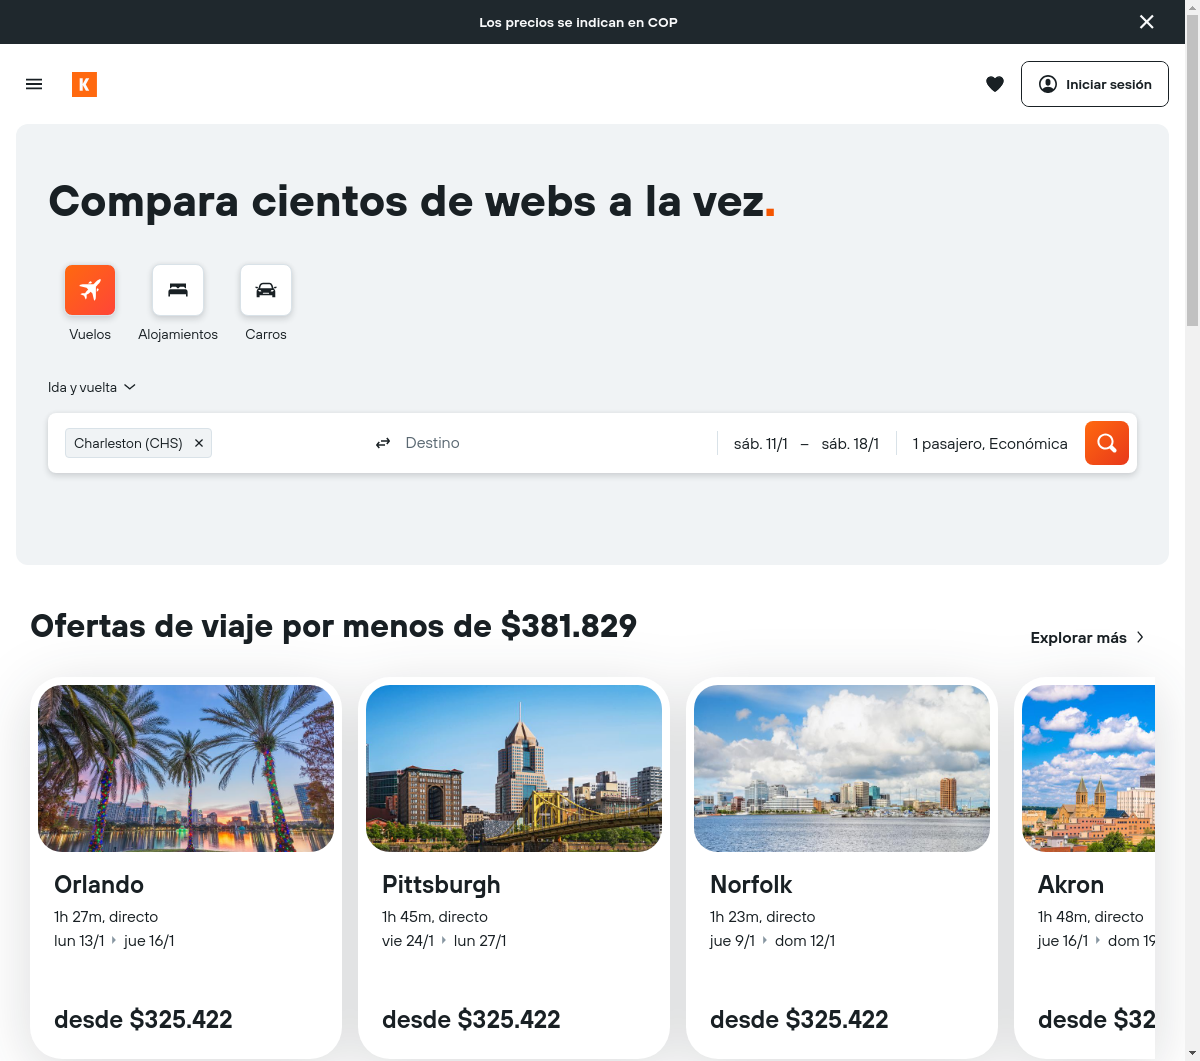

In [ ]:
#Guardamos las imagenes y las mostramos
driver.save_screenshot("screenshot1.png")
Image("screenshot1.png")

**1. Obtenga una lista de vuelos.**

In [ ]:
#aqui en la parte inferior seleccionamos vuelos a Nueva york
driver.find_element(By.XPATH, '//a[contains(text(),"Vuelos a Nueva York")]').click()

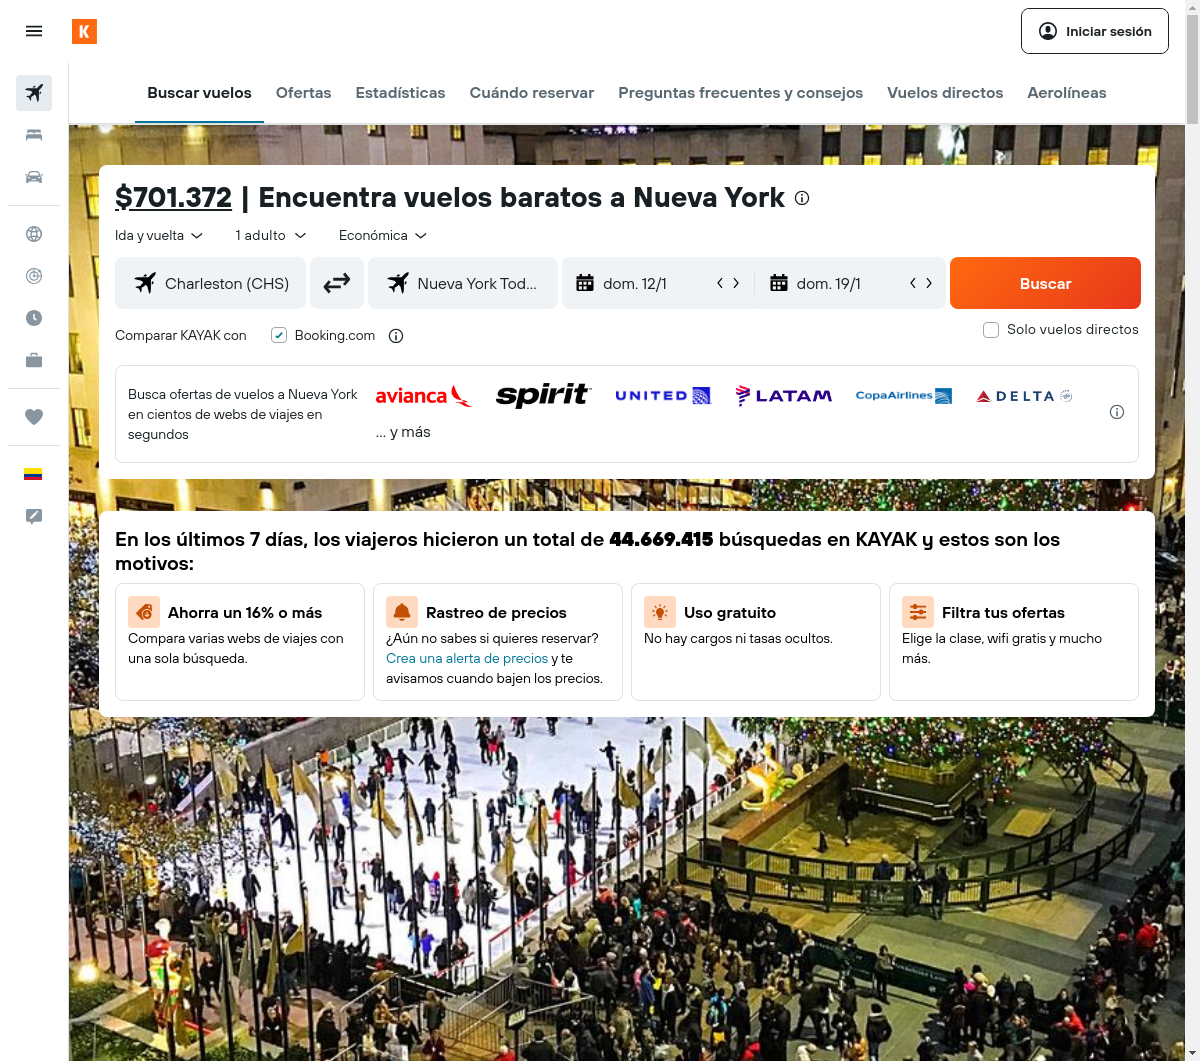

In [ ]:
#Guardamos las imagenes y las mostramos
driver.save_screenshot("screenshot2.png")
Image("screenshot2.png")

In [ ]:
#Creamos una espera maxima de 10 segundo para continuar , para poder hacer click(visible y habilitad)
WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, '//div[@role="button" and @data-text="Ofertas"]'))
).click()

In [ ]:
#para hacer scroll
driver.execute_script("window.scrollBy(0,10);")


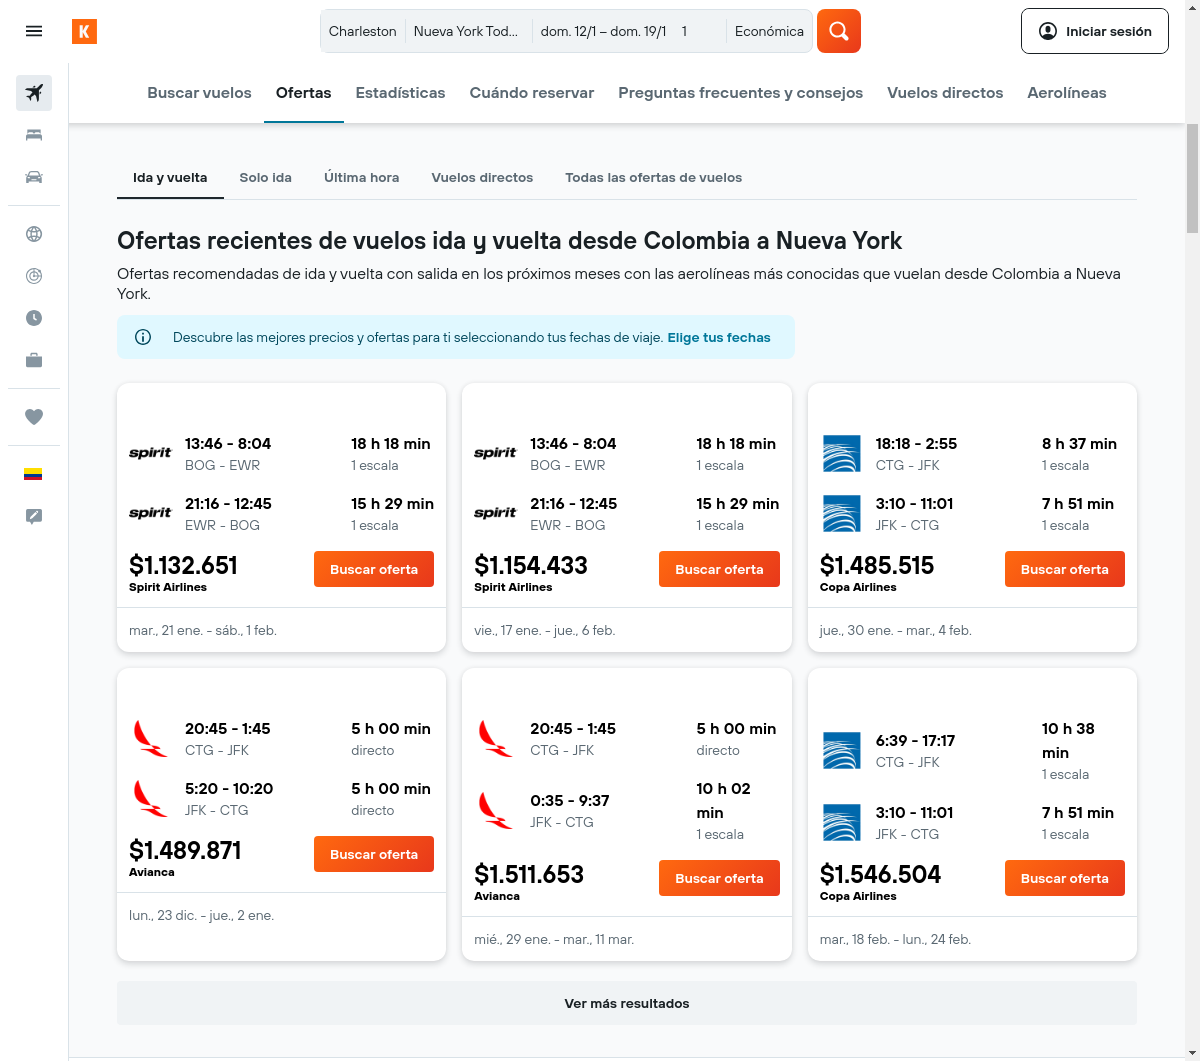

In [ ]:
driver.save_screenshot("screenshot3.png")
Image("screenshot3.png")

In [ ]:
#para darle click al boton ver mas y desplegar mas resultados
button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, '//div[contains(@class, "Iqt3-button-content") and text()="Ver más resultados"]'))
)
button.click()

In [ ]:
#vamos a obtener las secciones de horarios de todas las tarjetas
secciones_horarios = driver.find_elements(By.XPATH, '//div[@class="Ze-l-info-column Ze-l-mod-large"]/span[@class="Ze-l-primary-text"]')


In [ ]:
# vamos a obtener las secciones de duración de todas las tarjetas
secciones_duraciones = driver.find_elements(By.XPATH, '//div[@class="Ze-l-info-column Ze-l-mod-small"]/span[@class="Ze-l-primary-text"]')

In [ ]:
#vamos a obtener las las aerolinias de todas las tarjetas
aerolinias = driver.find_elements(By.CLASS_NAME, 'Ze-l-airline-name')


In [ ]:
#vamos a obtener los precios de los vuelos
precios = driver.find_elements(By.XPATH, '//span[@class="Ze-l-price"]')

In [ ]:
# Limpiar datos vacíos
horarios_text = [h.text for h in secciones_horarios if h.text.strip()]
duraciones_text = [d.text for d in secciones_duraciones if d.text.strip()]
aerolineas_text = [a.text for a in aerolinias if a.text.strip()]
precios_text = [p.text for p in precios if p.text.strip()]

In [ ]:
# Crear la lista que almacenará los vuelos
vuelos = []

In [ ]:
for i in range(len(horarios_text) // 2):  # Cada tarjeta tiene dos horarios
    # Obtener hora1 y hora2 y descomponerlas
    hora_inicio1, hora_fin1 = horarios_text[i * 2].split(' - ')
    hora_inicio2, hora_fin2 = horarios_text[i * 2 + 1].split(' - ')

    vuelo = {
        'hora_inicio1': hora_inicio1.strip(),  # Hora de inicio del primer horario
        'hora_fin1': hora_fin1.strip(),       # Hora de fin del primer horario
        'hora_inicio2': hora_inicio2.strip(), # Hora de inicio del segundo horario
        'hora_fin2': hora_fin2.strip(),       # Hora de fin del segundo horario
        'duracion1': duraciones_text[i * 2],  # Primera duración
        'duracion2': duraciones_text[i * 2 + 1],  # Segunda duración
        'precio': precios_text[i],  # Precio
        'aerolinea': aerolineas_text[i]  # Aerolínea
    }
    vuelos.append(vuelo)

In [ ]:
# Mostrar los datos recopilados
for vuelo in vuelos:
    print(vuelo)

{'hora_inicio1': '13:46', 'hora_fin1': '8:04', 'hora_inicio2': '21:16', 'hora_fin2': '12:45', 'duracion1': '18 h 18 min', 'duracion2': '15 h 29 min', 'precio': '$1.132.651', 'aerolinea': 'Spirit Airlines'}
{'hora_inicio1': '13:46', 'hora_fin1': '8:04', 'hora_inicio2': '21:16', 'hora_fin2': '12:45', 'duracion1': '18 h 18 min', 'duracion2': '15 h 29 min', 'precio': '$1.154.433', 'aerolinea': 'Spirit Airlines'}
{'hora_inicio1': '18:18', 'hora_fin1': '2:55', 'hora_inicio2': '3:10', 'hora_fin2': '11:01', 'duracion1': '8 h 37 min', 'duracion2': '7 h 51 min', 'precio': '$1.485.515', 'aerolinea': 'Copa Airlines'}
{'hora_inicio1': '20:45', 'hora_fin1': '1:45', 'hora_inicio2': '5:20', 'hora_fin2': '10:20', 'duracion1': '5 h 00 min', 'duracion2': '5 h 00 min', 'precio': '$1.489.871', 'aerolinea': 'Avianca'}
{'hora_inicio1': '20:45', 'hora_fin1': '1:45', 'hora_inicio2': '0:35', 'hora_fin2': '9:37', 'duracion1': '5 h 00 min', 'duracion2': '10 h 02 min', 'precio': '$1.511.653', 'aerolinea': 'Avianca

**2. Imprima el número de vuelos.**

In [ ]:
#2. Imprima el número de vuelos.
print(f"Se encontraron {len(vuelos)} vuelos.")

Se encontraron 10 vuelos.


**3. Imprima la información del vuelo de la lista en la posición 2**

In [ ]:
#3. Imprima la información del vuelo de la lista en la posición 2
if 2 < len(vuelos):
    print("Información del vuelo en la posición 2:")
    print(vuelos[2])
else:
    print("No hay suficientes vuelos en la lista.")

Información del vuelo en la posición 2:
{'hora_inicio1': '18:18', 'hora_fin1': '2:55', 'hora_inicio2': '3:10', 'hora_fin2': '11:01', 'duracion1': '8 h 37 min', 'duracion2': '7 h 51 min', 'precio': '$1.485.515', 'aerolinea': 'Copa Airlines'}


**4. Obtenga para ese vuelo la hora de llegada, la hora de salida y la duración del vuelo.**

In [ ]:
#4. Obtenga para ese vuelo la hora de llegada, la hora de salida y la duración del vuelo.
if 2 < len(vuelos):
    vuelo_posicion_2 = vuelos[2]
    print("Información del vuelo en la posición 2:")
    print(f"Hora de salida 1: {vuelo_posicion_2['hora_inicio1']}")
    print(f"Hora de llegada 1: {vuelo_posicion_2['hora_fin1']}")

Información del vuelo en la posición 2:
Hora de salida 1: 18:18
Hora de llegada 1: 2:55


In [ ]:
# Cerrar el navegador
driver.quit()